In [1]:
# mv this notebook in src folder
# or
# set sys path to src folder
import os, sys
path_to_scr_folder=os.path.join(os.path.dirname(os.path.abspath('')), 'src')
sys.path.append(path_to_scr_folder)

In [2]:
import peak_simulation
import read_chroma
import plot

In [9]:
# FILENAME of the chromatogram used as model to create the new chromatogram
# model_filename='F:/Bureau/032023-data-Tenax-VOC-COVID/801850-A-C-01-157-split10.cdf'
# model_filename=...
# model_filename='F:/Bureau/032023-data-Tenax-VOC-COVID/801850-A-C-01-157-split10.cdf'
model_filename='/home/camille/Documents/app/data/A-F-028-817822-droite-ReCIVA.cdf'
file_path_h5='/home/camille/Documents/app/data/A-F-028-817822-droite-ReCIVA.h5'


# PATH where the cdf and the associated ground truth will be created
# new_cdf_path=...
new_cdf_path="/home/camille/Documents/app/data/SIMULATION/"
# NAME of the new chromatogram
# cdf_name="test"
# cdf_name=...
cdf_name="simulation_Reciva"

# FILENAME of the HMDB library. The file alread exists in the src folder but can be recreated. See README.md https://github.com/Easy47/Python-2DGC#if-you-need-to-simulate-data (2.)
# lib_path='C:/Users/Stan/Python-2DGC/src/lib_EIB_gt.mgf'
# lib_path=...
# lib_path='C:/Users/Stan/Python-2DGC/src/lib_EIB_gt.mgf'
lib_path='/home/camille/Documents/code/Python-2DGC-Alignment/src/lib_EIB_gt.mgf'

# FILENAME of the HMDB library spectra pairwise scores
# scores_path='C:/Users/Stan/Python-2DGC/src/lib_scores.json'
# scores_path=...
# scores_path='C:/Users/Stan/Python-2DGC/src/lib_scores.json'


In [16]:
#scores
import utils

utils.generate_lib_scores_from_lib(lib_filename="../src/lib_EIB.mgf", output_path = "./lib_scores.json")


KeyboardInterrupt: 

In [10]:
scores_path='./lib_scores.json'

In [11]:
min_similarity=0.8      # Pics bien définis
max_similarity=0.95     # Éviter la redondance
min_overlap=0.5 #0.1         # Chevauchement minimal
max_overlap=0.8 #0.3        # Pas trop de coélution
intensity_range_min=50000  # Intensités détectables
intensity_range_max=200000
noise_scale=200.0       # moins de variabilite
nb_chromato=10          # Plusieurs variantes
noise_loc=500.0         # Bruit localisé

# ou pour tester la robustesse
# noise_loc=2000.0,         # Bruit élevé
# noise_scale=800.0,        # Haute variabilité

# noise_loc=100.0,          # Bruit très faible pour tests
# noise_scale=50.0,

# ancienne value
# noise_loc=1000.0
# noise_scale=500.0
# min_overlap=0.70
# max_overlap=0.99
# intensity_range_min=60000000
# intensity_range_max=90000000

In [13]:
import h5py
def get_mod_time(file_path_h5):
        """Get modulation time based on scan_number from CDF file."""
           #TODO recup  le .npy
        # print(f"Analyzing file: {file_path}")
        with h5py.File(file_path_h5, 'r') as f:
            scan_number = f.attrs['scan_number_size']
            print(f"scan_number_size: {scan_number}")

        # data = nc.Dataset(file_path, 'r')
        # scan_number = data.dimensions['scan_number'].size
        if scan_number == 328125:   
            mod_time = 1.25
            print("type de donnees: G0/plasma")
        elif scan_number == 540035:
            mod_time = 1.7
            print("type de donnnees: air expire")
        else:
            print("scan_number non reconnu")
        # mod_time =1.7
        print(f"modulation time: {mod_time}")
        return mod_time

mod_time = get_mod_time(file_path_h5)

scan_number_size: 540035
type de donnnees: air expire
modulation time: 1.7


In [18]:
params = peak_simulation.simulation_from_cdf_model(
    new_cdf_path=new_cdf_path,
    cdf_name=cdf_name,
    model_filename=model_filename,
    lib_path=lib_path,scores_path=scores_path,
    noise_loc=noise_loc,
    noise_scale=noise_scale,
    min_overlap=min_overlap,
    max_overlap=max_overlap,
    intensity_range_min=intensity_range_min,
    intensity_range_max=intensity_range_max)

4 499
new_chromato_cube shape:  (496, 2160, 250)


Plot the created chromatogram

# transformer  mon .cdf en .h5 avec lappli flask
chemin d entree : /home/camille/Documents/app/data/SIMULATION/
chemin de sortie :/home/camille/Documents/app/data/SIMULATION/

In [15]:
chromato_obj_new=read_chroma.read_chroma(new_cdf_path + '/' + cdf_name + ".h5", mod_time)

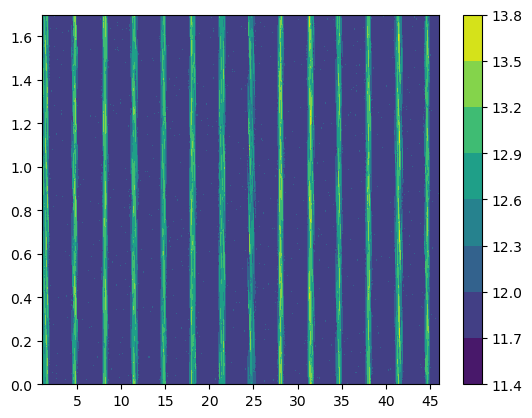

In [17]:
plot.visualizer((chromato_obj_new[0], chromato_obj_new[1]), mod_time=mod_time)